# Project for the prediction of price of bitcoin

## Project submitted by Yogeshwar Upendra Shendye

## importing required libraries
### numpy for mathematical operations
### pandas for reading the dataset and perform data cleansing operations
### matplotlib and seaborn for data visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

Matplotlib is building the font cache; this may take a moment.


### To begin, we have to import the dataset into our memory

In [2]:
dataset_link = 'Bitcoin.csv'
bitcoin_dataset = pd.read_csv(dataset_link)

### Now we have to examine the data so that we could make sense out of it.
### This is data analysis phase

In [3]:
#viewwing the data
bitcoin_dataset.head(15)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1417412280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1417412340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1417412400,300.0,300.0,300.0,300.0,0.01,3.0,300.0
8,1417412460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1417412520,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#printing out data types of each colum
bitcoin_dataset.dtypes

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

### columns and row count of data

In [5]:
#printing out basic information about the data
print('Columns available in the dataset : ')
print(bitcoin_dataset.columns)

Columns available in the dataset : 
Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')


In [6]:
print('Dataset has', len(bitcoin_dataset), ' rows in it')

Dataset has 2099760  rows in it


## checking for null data existance. We prefer that the data we process on is clean

In [7]:
#get total numbers of null or empty values from each column
bitcoin_dataset.isnull().sum()

Timestamp                 0
Open                 109069
High                 109069
Low                  109069
Close                109069
Volume_(BTC)         109069
Volume_(Currency)    109069
Weighted_Price       109069
dtype: int64

In [8]:
#printing percent of missing values in each row
bitcoin_dataset.isnull().mean().round(4) * 100

Timestamp            0.00
Open                 5.19
High                 5.19
Low                  5.19
Close                5.19
Volume_(BTC)         5.19
Volume_(Currency)    5.19
Weighted_Price       5.19
dtype: float64

<AxesSubplot:>

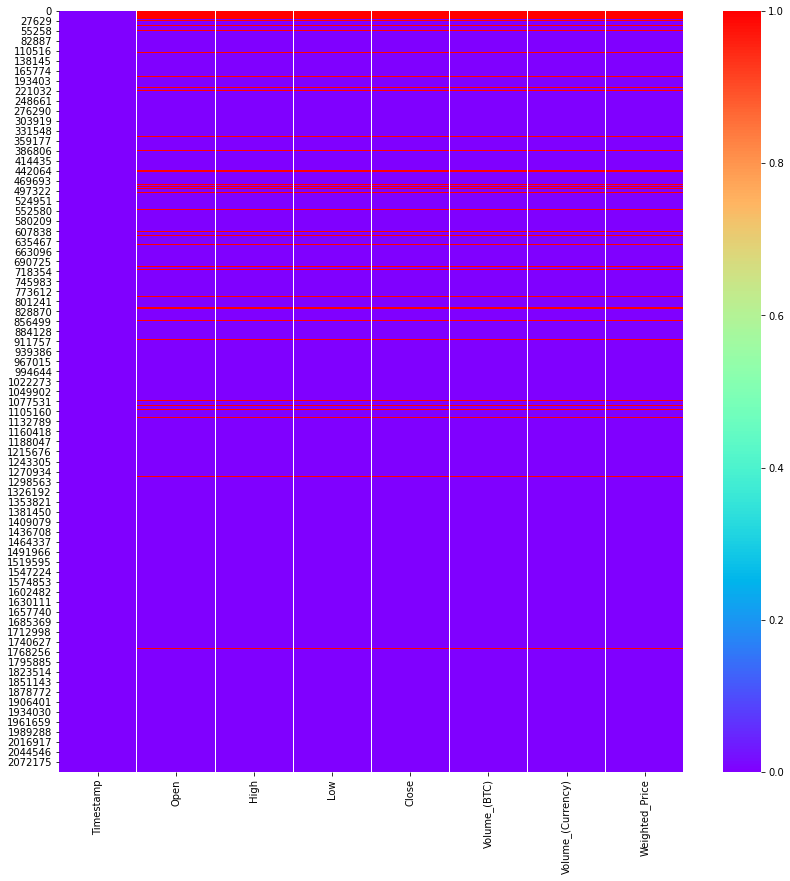

In [9]:
plt.figure(figsize=(14, 14))
sbn.heatmap(bitcoin_dataset.isnull(), cmap='rainbow')

## as per above observations, it's clear that 109069 observations out of 2099760 observations are null. That's only 5% of out total data. So it's safe to drop the values

In [10]:
#dropping the null values
bitcoin_dataset.dropna(inplace=True)
#if dropping causes any problem, we could replace the values

In [11]:
## checking for null data existance once again after dropping values
bitcoin_dataset.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

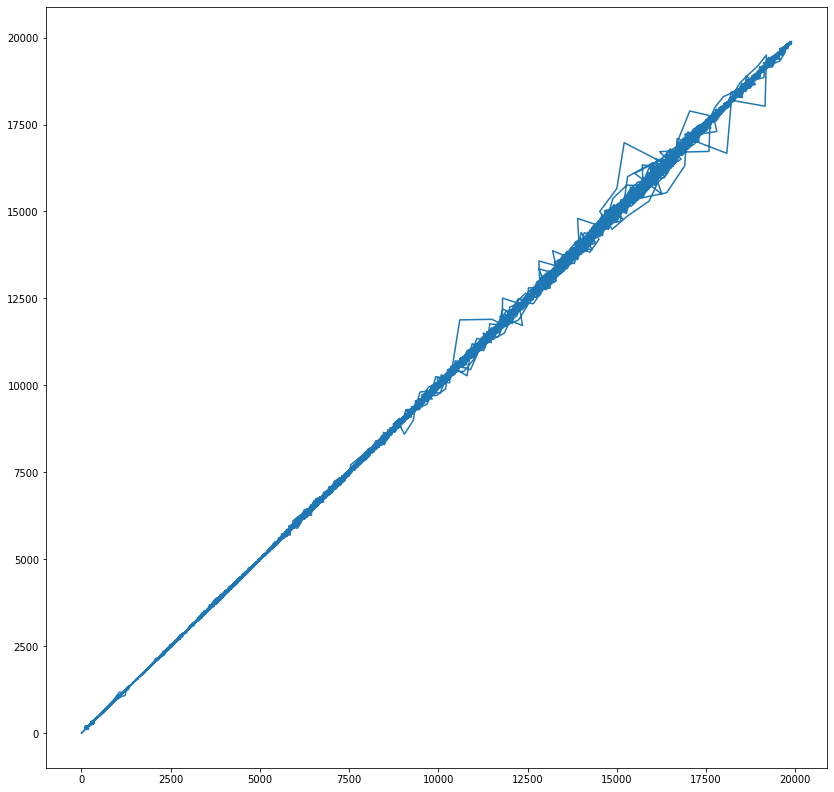

In [12]:
#If we plot a graph of open vs close figure, we might get insight about difference between price
plt.figure(figsize=(14, 14))
plt.plot(bitcoin_dataset['Open'], bitcoin_dataset['Close'])

### we can see the value saturation of each values using plots

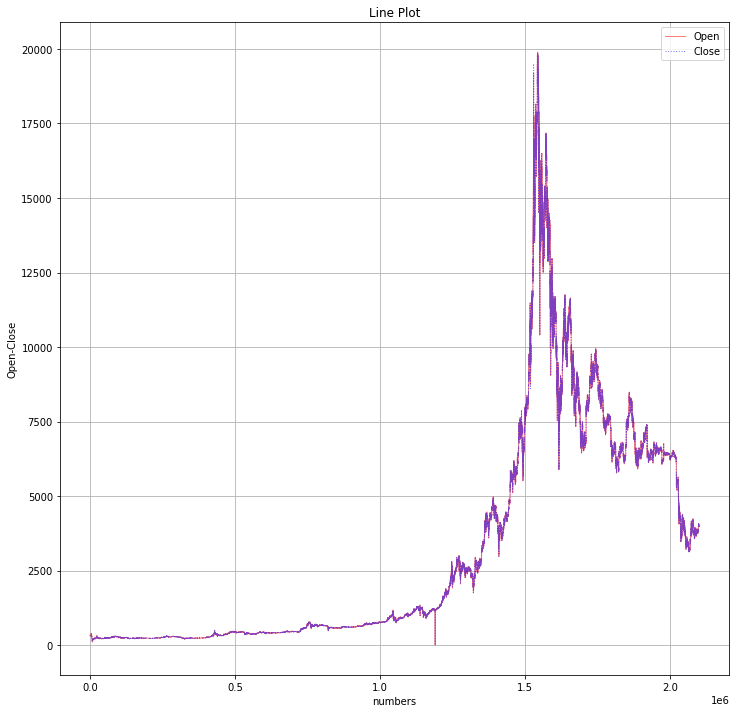

In [13]:
plt.figure(figsize=(12, 12))
bitcoin_dataset['Open'].plot(kind = 'line', color = 'r',label = 'Open',linewidth=1,alpha = 0.5,grid = True,linestyle = '-')
bitcoin_dataset['Close'].plot(color = 'b',label = 'Close',linewidth=1, alpha = 0.5,grid = True,linestyle = ':')

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('numbers')              # label = name of label
plt.ylabel('Open-Close')
plt.title('Line Plot')            # title = title of plot
plt.show()

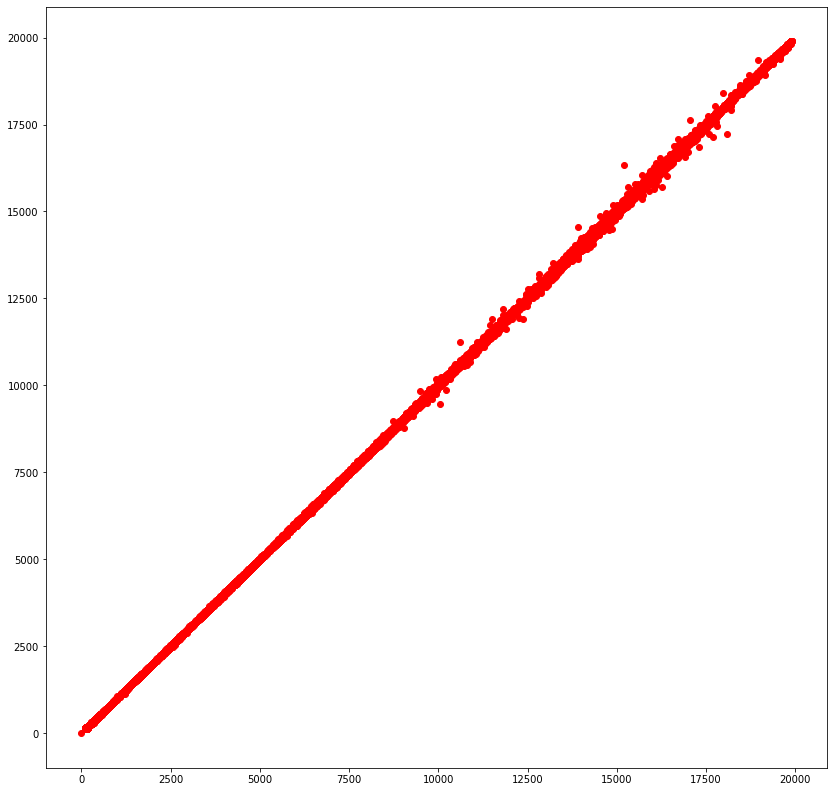

In [14]:
#scatter plot of high vs Open
plt.figure(figsize=(14, 14))
plt.scatter(x=bitcoin_dataset['Open'], y=bitcoin_dataset['Weighted_Price'], c='r')

### We use correlation to find out which columns are related mostly with which columns

In [15]:
bitcoin_dataset.corr()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,1.000000,0.739841,0.739709,0.739981,0.739841,0.083118,0.216426,0.739844
Open,0.739841,1.000000,0.999998,0.999998,0.999997,0.147888,0.399696,0.999999
High,0.739709,0.999998,1.000000,0.999996,0.999998,0.148487,0.400542,0.999999
Low,0.739981,0.999998,0.999996,1.000000,0.999998,0.147208,0.398760,0.999999
Close,0.739841,0.999997,0.999998,0.999998,1.000000,0.147858,0.399670,0.999999
Volume_(BTC),0.083118,0.147888,0.148487,0.147208,0.147858,1.000000,0.710127,0.147834
Volume_(Currency),0.216426,0.399696,0.400542,0.398760,0.399670,0.710127,1.000000,0.399635
Weighted_Price,0.739844,0.999999,0.999999,0.999999,0.999999,0.147834,0.399635,1.000000


In [16]:
#we can represent the correlation better with heatmap

<AxesSubplot:>

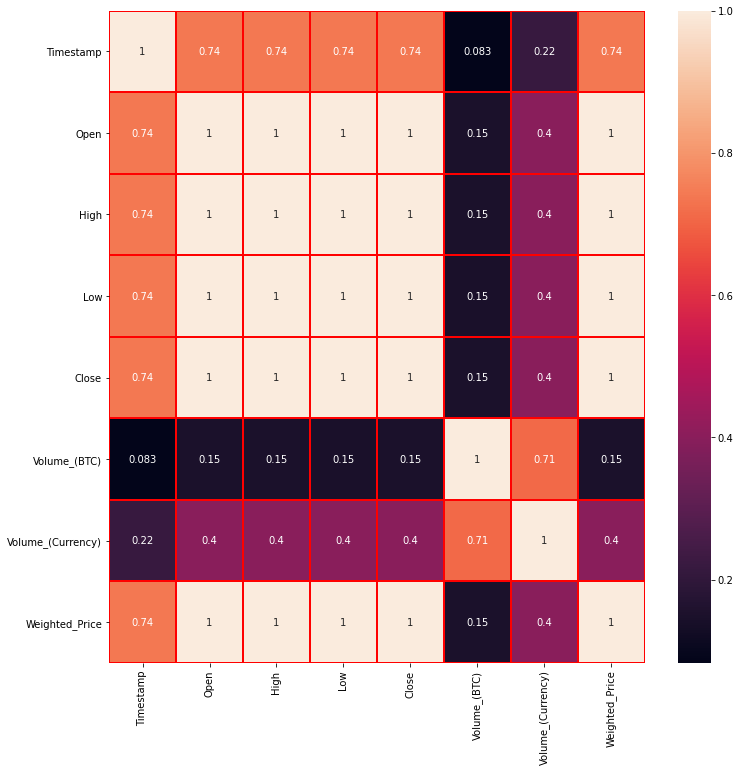

In [17]:
plt.figure(figsize=(12, 12))
sbn.heatmap(data=bitcoin_dataset.corr(), linewidths=1, linecolor='r', annot=True)

In [18]:
#we might want to rename the columns Volume_(BTC) and Volume_(Currency) to avoid future errors
bitcoin_dataset.rename(columns={'Volume_(BTC)' : 'Volume_BTC', 'Volume_(Currency)' : 'Volume_Currency'}, inplace=True)

### Similarly we also want dates to be readed as dates, so we use 

In [19]:
bitcoin_dataset['ConvDate'] = pd.to_datetime(bitcoin_dataset['Timestamp'], unit='s')

In [20]:
bitcoin_dataset.drop(labels='Timestamp', axis=1)

,Open,High,Low,Close,Volume_BTC,Volume_Currency,Weighted_Price,ConvDate
0,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000,2014-12-01 05:33:00
7,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000,2014-12-01 05:40:00
51,370.00,370.00,370.00,370.00,0.010000,3.700000,370.000000,2014-12-01 06:24:00
77,370.00,370.00,370.00,370.00,0.026556,9.825550,370.000000,2014-12-01 06:50:00
1436,377.00,377.00,377.00,377.00,0.010000,3.770000,377.000000,2014-12-02 05:29:00
...,...,...,...,...,...,...,...,...
2099755,4006.01,4006.57,4006.00,4006.01,3.382954,13553.433078,4006.390309,2019-01-07 22:02:00
2099756,4006.01,4006.57,4006.00,4006.01,0.902164,3614.083169,4006.017233,2019-01-07 22:03:00
2099757,4006.01,4006.01,4006.00,4006.01,1.192123,4775.647308,4006.003635,2019-01-07 22:04:00
2099758,4006.01,4006.01,4005.50,4005.50,2.699700,10814.241898,4005.719991,2019-01-07 22:05:00


# Now that we have cleared out all of our data, we can create our own model and make predictions

### We will use open, high, low prices along Volume_BTC to train the model

### We will output closing value of the bitcoin

In [21]:
features_to_train = ['Open', 'High', 'Low', 'Volume_BTC']
output_features = ['Close']

### For the prediction of bitcoin, I have used linear regression model. This is because the linear regression is best suited for the continuous type of data. 

### Other models like decision tree, random forest and logical regression are suited for classification problem rather than the predictions.

### formula for regression is y = mx + c

### For better results we will use 70% data for training and remaining 30% data for testing purpose

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    bitcoin_dataset[features_to_train],
    bitcoin_dataset[output_features],
    test_size = 0.3,
    random_state = 1
)

In [23]:
#creating a LinearRegression model
from sklearn.linear_model import LinearRegression
regression_model1 = LinearRegression()
regression_model1.fit(x_train, y_train)

LinearRegression()

In [24]:
#training score of the model
train_socre = regression_model1.score(x_train, y_train)
print('Score of LinearRegression training model for bitcoin prediction is ' + str(train_socre * 100) + '%')

Score of LinearRegression training model for bitcoin prediction is 99.99991724092348%


In [25]:
#testing score of the model
test_score = regression_model1.score(x_test, y_test)
print('Score of LinearRegression testing model for bitcoin prediction is ' + str(test_score * 100) + '%')

Score of LinearRegression testing model for bitcoin prediction is 99.99991217874083%


### Plotting the scatterplot of prediction vs actual values

In [26]:
prediction = regression_model1.predict(x_test)

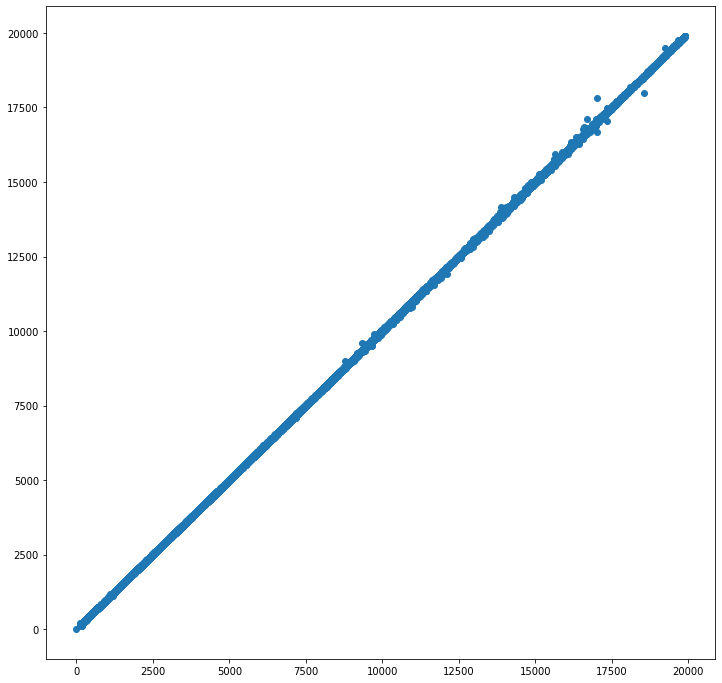

In [27]:
#plotting the graph prediction vs y_test
plt.figure(figsize=(12, 12))
plt.scatter(x=prediction, y=y_test)
plt.show()

### From above graph  it's clear that the predictions that we are making are mostly correct. So we can conclude that the model is highly successfull in predictiing the price!!

### Now our model is ready!! Now we can predict the Closing price of bitcoin

In [28]:
sample = [[377.0, 377.0, 377.0, 0.001]]

In [29]:
regression_model1.predict(sample)

array([[377.02356419]])

### Another way of measuing  accuracy is r square score

In [30]:
from sklearn.metrics import r2_score

In [31]:
prediction = regression_model1.predict(x_test)

In [32]:
new_sc = r2_score(prediction, y_test)
new_sc

0.9999991217802848

In [33]:
#printing r square score of the model
print('R2 Score of LinearRegression model for bitcoin prediction is ' + str(new_sc * 100) + '%')

R2 Score of LinearRegression model for bitcoin prediction is 99.99991217802848%
